In [46]:
import pandas as pd
import numpy as np

# Carregar e fazer leitura dos dados dentro do projeto
caminho_do_arquivo = "../desafio-ds-imdb-diel/desafio_indicium_imdb.csv"
data = pd.read_csv(caminho_do_arquivo)

In [47]:
# Verificar as linhas do data frame para inspeção
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [48]:
# Limpeza e processamento dos Dados

# Remover a coluna 'Unnamed : 0' que não é necessária para análise
data = data.drop(columns=['Unnamed: 0'])

# Converter 'Released_Year' para numérico, substituindo valores inválidos por NaN
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')

# Remover caracteres não numéricos e virgulas da coluna 'Gross' e converter para numérico
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)

# Substituir valores ausentes em 'Certificate' por 'NaN'
data['Certificate'] = data['Certificate'].fillna(np.NaN)

# Substituir valores ausentes em 'Meta_score' pela média dos valores disponíveis
meta_score_mean = data['Meta_score'].mean()
data['Meta_score'] = data['Meta_score'].fillna(meta_score_mean)

# Substituir valores ausentes em 'Gross' pela média dos valores disponíveis
gross_mean = data['Gross'].mean()
data['Gross'] = data['Gross'].fillna(gross_mean)

# Converter a coluna 'Runtime' para minutos numéricos
data['Runtime'] = data['Runtime'].str.replace(' min', '').astype(int)

In [49]:
# Verificar as limpezas
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


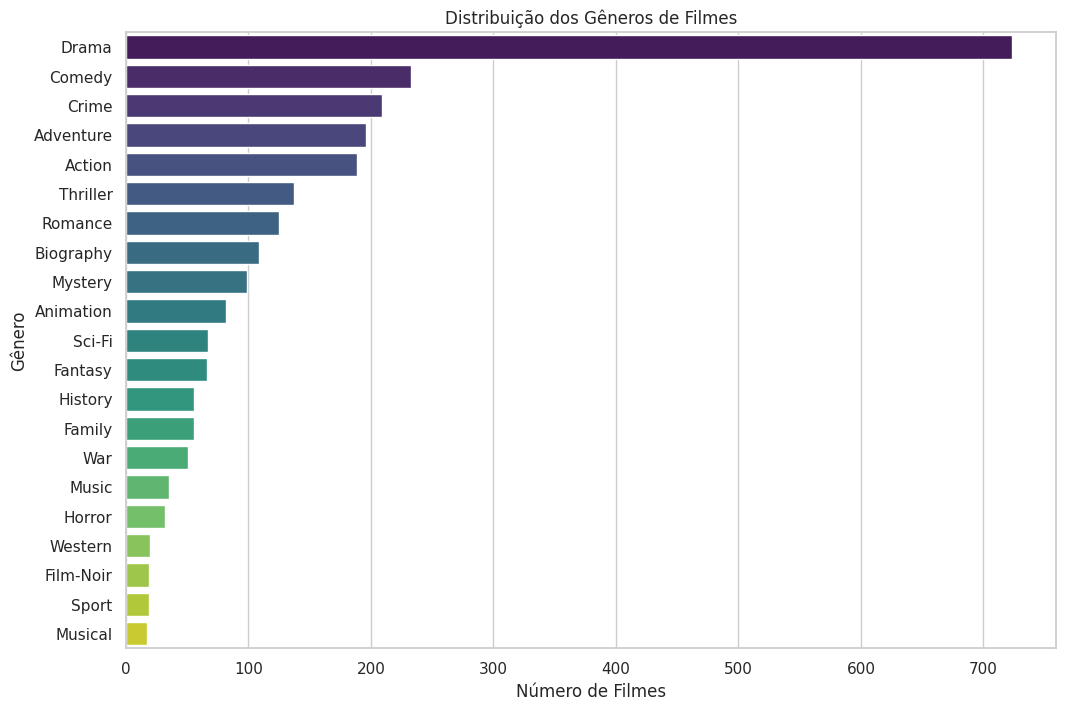

In [56]:
# Análise Exploratória dos Dados (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")

# Distribuição dos Gêneros
generos = data["Genre"].str.get_dummies(sep=", ")
contagem_generos = generos.sum().sort_values(ascending=False)

# Plotar a distribuição dos gêneros
plt.figure(figsize=(12, 8))
sns.barplot(
    x=contagem_generos.values,
    y=contagem_generos.index,
    hue=contagem_generos.index,
    palette="viridis",
    legend=False,
)
# Títutlo
plt.title("Distribuição dos Gêneros de Filmes")
plt.xlabel("Número de Filmes")
plt.ylabel("Gênero")
plt.show()